=== PRAKTIKUM 1: DASAR-DASAR CITRA DIGITAL ===
Materi: Representasi Citra, Resolusi, Depth, Aspect Ratio


1. LOADING SAMPLE IMAGE

ANALYSIS: Original Color Image
Dimensions: 512 x 512
Channels: 3
Resolution: 262,144 pixels
Aspect Ratio: 1.00 (512:512)
Bit Depth: 8-bit (uint8)
Memory Size: 786,432 bytes
             768.00 KB
             0.75 MB


2. REPRESENTASI SEBAGAI MATRIKS
Mengakses nilai pixel pada posisi tertentu:
Pixel pada posisi (100, 100): BGR = [ 87  74 182]

Area 5x5 pixel dari posisi (100,100):
[[[ 87  74 182]
  [ 80  67 175]
  [ 81  71 177]
  [ 77  67 173]
  [ 83  73 179]]

 [[ 84  74 180]
  [ 79  69 175]
  [ 81  71 177]
  [ 77  67 173]
  [ 76  68 175]]

 [[ 76  66 172]
  [ 78  68 174]
  [ 80  73 178]
  [ 77  70 175]
  [ 72  66 173]]

 [[ 71  61 167]
  [ 77  67 173]
  [ 79  72 177]
  [ 74  67 172]
  [ 79  73 180]]

 [[ 82  71 175]
  [ 77  65 171]
  [ 82  72 178]
  [ 79  69 176]
  [ 76  67 177]]]


3. KONVERSI KE GRAYSCALE

ANALYSIS: Grayscale Image
Dimensions: 512 x 51

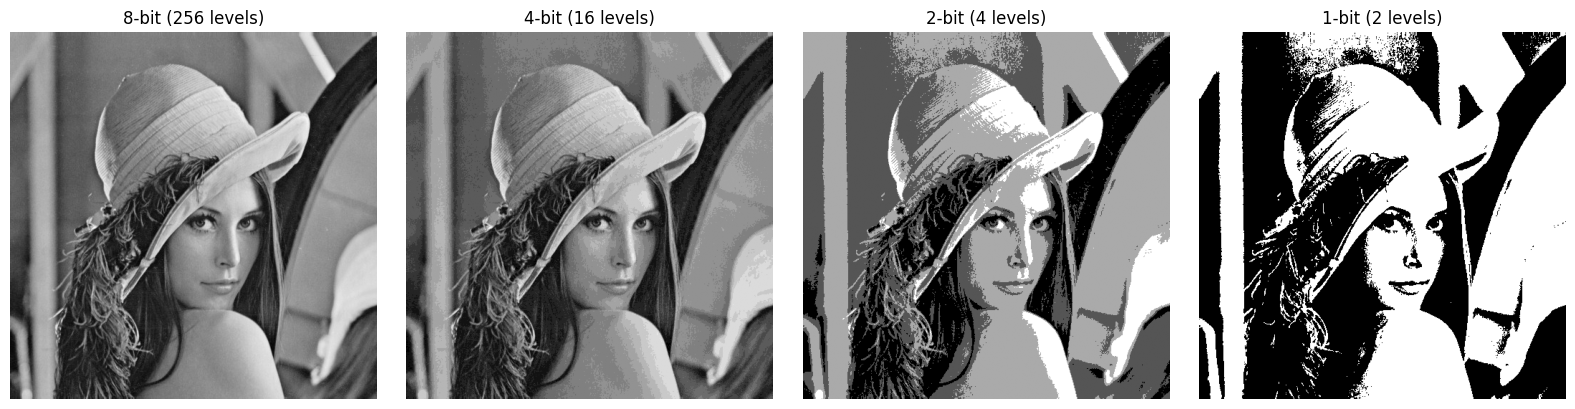



5. PENGARUH ASPECT RATIO


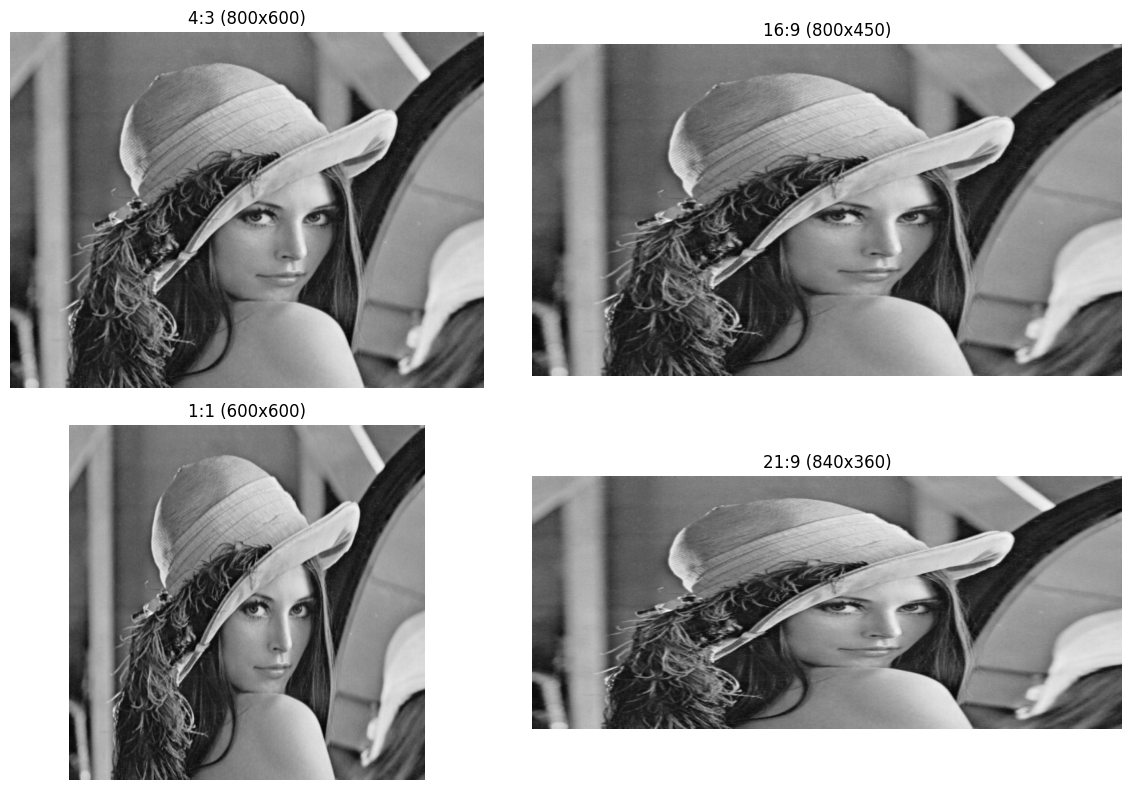



6. SEPARASI CHANNEL WARNA RGB


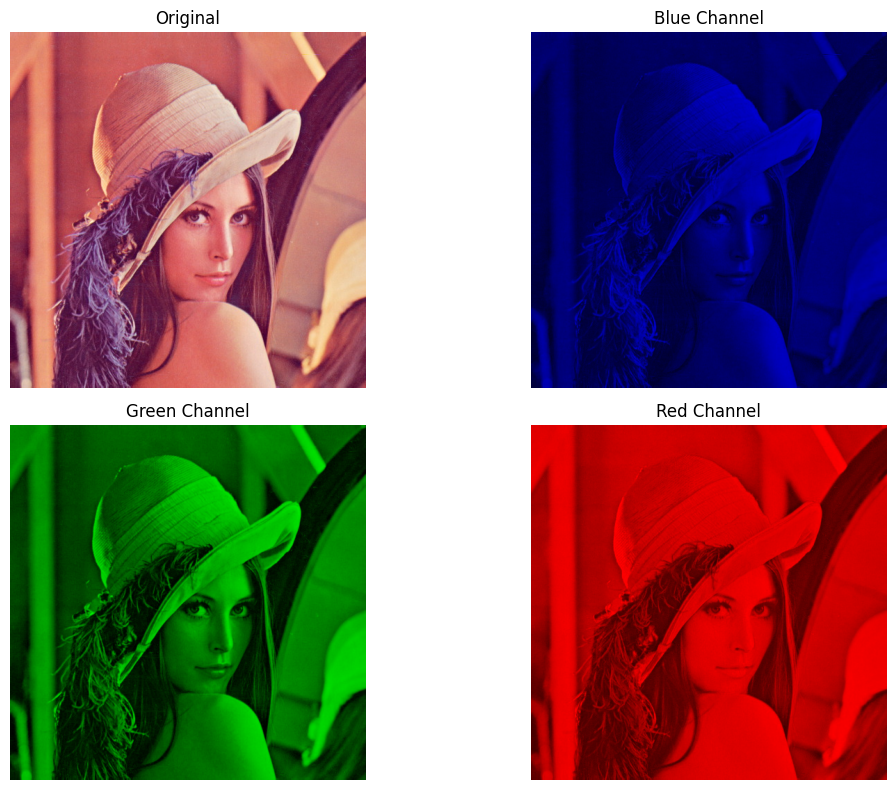



7. ANALISIS HISTOGRAM INTENSITAS


/tmp/ipython-input-762341911.py:156: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[0].hist(gray_img.ravel(), 256, [0, 256], color='gray')


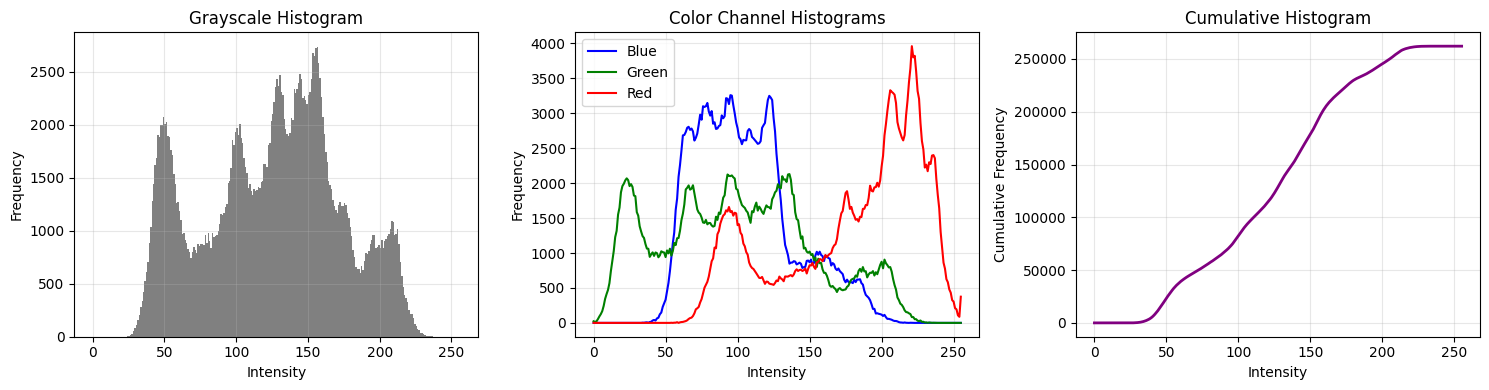



8. ANALISIS UKURAN MEMORI
Perbandingan ukuran memori untuk berbagai format:

Resolution      Format                        Memory
------------------------------------------------------------
640x480       Grayscale (8-bit)    307,200 bytes (0.3 MB)
640x480       RGB (24-bit)         921,600 bytes (0.9 MB)
640x480       RGBA (32-bit)        1,228,800 bytes (1.2 MB)
1920x1080      Grayscale (8-bit)    2,073,600 bytes (2.0 MB)
1920x1080      RGB (24-bit)         6,220,800 bytes (5.9 MB)
1920x1080      RGBA (32-bit)        8,294,400 bytes (7.9 MB)
3840x2160      Grayscale (8-bit)    8,294,400 bytes (7.9 MB)
3840x2160      RGB (24-bit)         24,883,200 bytes (23.7 MB)
3840x2160      RGBA (32-bit)        33,177,600 bytes (31.6 MB)

=== PRAKTIKUM SELESAI ===


In [ ]:
# ============================================
# PRAKTIKUM 1: DASAR-DASAR CITRA DIGITAL
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

print("=== PRAKTIKUM 1: DASAR-DASAR CITRA DIGITAL ===")
print("Materi: Representasi Citra, Resolusi, Depth, Aspect Ratio\n")

# =============== FUNGSI BANTU ===============
def download_sample_image():
    """Download sample image from internet"""
    url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

def analyze_image_properties(img, name="Image"):
    """Analyze and display image properties"""
    if len(img.shape) == 2:
        height, width = img.shape
        channels = 1
    else:
        height, width, channels = img.shape

    resolution = width * height
    aspect_ratio = width / height
    depth = img.dtype.itemsize * 8  # bytes to bits

    print(f"\n{'='*40}")
    print(f"ANALYSIS: {name}")
    print(f"{'='*40}")
    print(f"Dimensions: {width} x {height}")
    print(f"Channels: {channels}")
    print(f"Resolution: {resolution:,} pixels")
    print(f"Aspect Ratio: {aspect_ratio:.2f} ({width}:{height})")
    print(f"Bit Depth: {depth}-bit ({img.dtype})")

    # Calculate memory size
    memory_bytes = img.size * img.dtype.itemsize
    memory_kb = memory_bytes / 1024
    memory_mb = memory_kb / 1024

    print(f"Memory Size: {memory_bytes:,} bytes")
    print(f"             {memory_kb:.2f} KB")
    print(f"             {memory_mb:.2f} MB")

    # Calculate statistics
    if channels == 1:
        print(f"Intensity Range: [{img.min()}, {img.max()}]")
        print(f"Mean Intensity: {img.mean():.2f}")
        print(f"Std Deviation: {img.std():.2f}")

    return {
        'width': width,
        'height': height,
        'channels': channels,
        'resolution': resolution,
        'aspect_ratio': aspect_ratio,
        'depth': depth,
        'memory_bytes': memory_bytes
    }

def display_image_grid(images, titles, rows, cols, figsize=(15, 10)):
    """Display multiple images in a grid"""
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel() if rows > 1 or cols > 1 else [axes]

    for idx, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:
            axes[idx].imshow(img, cmap='gray')
        else:
            axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[idx].set_title(title)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# =============== MAIN PRAKTIKUM ===============

# 1. LOAD DAN ANALISIS CITRA SAMPLE
print("\n1. LOADING SAMPLE IMAGE")
original_img = download_sample_image()
props_original = analyze_image_properties(original_img, "Original Color Image")

# 2. REPRESENTASI MATRIKS
print("\n\n2. REPRESENTASI SEBAGAI MATRIKS")
print("Mengakses nilai pixel pada posisi tertentu:")

# Contoh akses pixel
x, y = 100, 100  # Koordinat (baris, kolom)
pixel_value = original_img[x, y]
print(f"Pixel pada posisi ({x}, {y}): BGR = {pixel_value}")

# Tampilkan area kecil 5x5 pixel
print("\nArea 5x5 pixel dari posisi (100,100):")
print(original_img[100:105, 100:105])

# 3. KONVERSI GRAYSCALE
print("\n\n3. KONVERSI KE GRAYSCALE")
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
props_gray = analyze_image_properties(gray_img, "Grayscale Image")

# 4. ANALISIS BIT DEPTH YANG BERBEDA
print("\n\n4. PENGARUH BIT DEPTH")
# Buat citra dengan bit depth berbeda
img_8bit = gray_img.astype(np.uint8)
img_4bit = (gray_img // 16).astype(np.uint8) * 16  # Reduce to 4-bit (16 levels)
img_2bit = (gray_img // 64).astype(np.uint8) * 64  # Reduce to 2-bit (4 levels)
img_1bit = (gray_img // 128).astype(np.uint8) * 255  # Binary image

# Tampilkan perbedaan
images = [img_8bit, img_4bit, img_2bit, img_1bit]
titles = ['8-bit (256 levels)', '4-bit (16 levels)', '2-bit (4 levels)', '1-bit (2 levels)']
display_image_grid(images, titles, 1, 4, figsize=(16, 4))

# 5. ANALISIS ASPECT RATIO
print("\n\n5. PENGARUH ASPECT RATIO")
# Resize dengan aspect ratio berbeda
h, w = gray_img.shape[:2]
img_4_3 = cv2.resize(gray_img, (800, 600))     # 4:3
img_16_9 = cv2.resize(gray_img, (800, 450))    # 16:9
img_1_1 = cv2.resize(gray_img, (600, 600))     # 1:1
img_21_9 = cv2.resize(gray_img, (840, 360))    # 21:9

images = [img_4_3, img_16_9, img_1_1, img_21_9]
titles = ['4:3 (800x600)', '16:9 (800x450)', '1:1 (600x600)', '21:9 (840x360)']
display_image_grid(images, titles, 2, 2, figsize=(12, 8))

# 6. SEPARASI CHANNEL WARNA
print("\n\n6. SEPARASI CHANNEL WARNA RGB")
# Pisahkan channel B, G, R
b, g, r = cv2.split(original_img)

# Buat citra untuk masing-masing channel
zeros = np.zeros_like(b)
blue_channel = cv2.merge([b, zeros, zeros])
green_channel = cv2.merge([zeros, g, zeros])
red_channel = cv2.merge([zeros, zeros, r])

images = [original_img, blue_channel, green_channel, red_channel]
titles = ['Original', 'Blue Channel', 'Green Channel', 'Red Channel']
display_image_grid(images, titles, 2, 2, figsize=(12, 8))

# 7. HISTOGRAM INTENSITAS
print("\n\n7. ANALISIS HISTOGRAM INTENSITAS")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram grayscale
axes[0].hist(gray_img.ravel(), 256, [0, 256], color='gray')
axes[0].set_title('Grayscale Histogram')
axes[0].set_xlabel('Intensity')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Histogram per channel warna
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([original_img], [i], None, [256], [0, 256])
    axes[1].plot(hist, color=color)
axes[1].set_title('Color Channel Histograms')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('Frequency')
axes[1].legend(['Blue', 'Green', 'Red'])
axes[1].grid(True, alpha=0.3)

# Cumulative histogram
cumulative_hist = np.cumsum(np.histogram(gray_img.ravel(), 256, [0, 256])[0])
axes[2].plot(cumulative_hist, color='purple', linewidth=2)
axes[2].set_title('Cumulative Histogram')
axes[2].set_xlabel('Intensity')
axes[2].set_ylabel('Cumulative Frequency')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. MEMORY ANALYSIS
print("\n\n8. ANALISIS UKURAN MEMORI")
print("Perbandingan ukuran memori untuk berbagai format:")

# Buat citra dengan ukuran berbeda
sizes = [(640, 480), (1920, 1080), (3840, 2160)]
formats = ['Grayscale (8-bit)', 'RGB (24-bit)', 'RGBA (32-bit)']

print("\n" + "="*60)
print(f"{'Resolution':<15} {'Format':<20} {'Memory':>15}")
print("-"*60)

for w, h in sizes:
    for fmt_idx, fmt_name in enumerate(formats):
        if fmt_name == 'Grayscale (8-bit)':
            channels = 1
            depth = 1  # byte per pixel
        elif fmt_name == 'RGB (24-bit)':
            channels = 3
            depth = 3
        else:  # RGBA
            channels = 4
            depth = 4

        memory = w * h * depth
        memory_kb = memory / 1024
        memory_mb = memory_kb / 1024

        print(f"{w}x{h:<9} {fmt_name:<20} {memory:,} bytes ({memory_mb:.1f} MB)")

print("="*60)

print("\n=== PRAKTIKUM SELESAI ===")